In [25]:
import requests
from scrapy import Selector
import json

In [15]:
url = "https://travelness.com/most-visited-cities-in-the-world"

response = requests.get(url)

table = Selector(response).css('table')
cities = table.xpath(".//tr/td[2]/text()").getall()

In [29]:
import googlemaps

credentials = open("../credentials.json").read()
API_KEY = json.loads(credentials)["API_key"]

gmaps = googlemaps.Client(key=API_KEY)
geocode_result = gmaps.geocode('1600 Amphitheatre Parkway, Mountain View, CA')


ApiError: REQUEST_DENIED (This API project is not authorized to use this API.)

In [5]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry


# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": 13.754,
    "longitude": 100.5014,
    "start_date": "2024-03-04",
    "end_date": "2024-03-18",
    "hourly": "temperature_2m"
}
responses = openmeteo.weather_api(url, params=params)


# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
    start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
    end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
    freq = pd.Timedelta(seconds = hourly.Interval()),
    inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

Coordinates 13.743409156799316°N 100.49586486816406°E
Elevation 7.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
                         date  temperature_2m
0   2024-03-04 00:00:00+00:00       27.406500
1   2024-03-04 01:00:00+00:00       29.806499
2   2024-03-04 02:00:00+00:00       30.906500
3   2024-03-04 03:00:00+00:00       31.256500
4   2024-03-04 04:00:00+00:00       32.556499
..                        ...             ...
355 2024-03-18 19:00:00+00:00       27.956501
356 2024-03-18 20:00:00+00:00       27.806499
357 2024-03-18 21:00:00+00:00       27.706501
358 2024-03-18 22:00:00+00:00       27.656500
359 2024-03-18 23:00:00+00:00       27.706501

[360 rows x 2 columns]


In [9]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": [39.55, 19.0728, 22.5455, 36.9081, 41.0138, 3.1412, 25.0772, 1.2897, 51.5085, 22.2783, 48.8534, 28.6519, 35.6895, 25.0478, 12.9333, 41.8919, 40.7143, 13.754],
    "longitude": [2.7333, 72.8826, 114.0683, 30.6956, 28.9497, 101.6865, 55.3093, 103.8501, -0.1257, 114.1747, 2.3488, 77.2315, 139.6917, 121.5319, 100.8833, 12.5113, -74.006, 100.5014],
    "start_date": "1940-01-01",
    "end_date": "2024-03-01",
    "daily": ["precipitation_sum", "rain_sum", "precipitation_hours"]
}
responses = openmeteo.weather_api(url, params=params)


# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")


# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_precipitation_sum = daily.Variables(0).ValuesAsNumpy()
daily_rain_sum = daily.Variables(1).ValuesAsNumpy()
daily_precipitation_hours = daily.Variables(2).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
    start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
    end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
    freq = pd.Timedelta(seconds = daily.Interval()),
    inclusive = "left"
)}
daily_data["precipitation_sum"] = daily_precipitation_sum
daily_data["rain_sum"] = daily_rain_sum
daily_data["precipitation_hours"] = daily_precipitation_hours

daily_dataframe = pd.DataFrame(data = daily_data)
display(daily_dataframe)


Coordinates 39.54305648803711°N 2.742382287979126°E
Elevation 2.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s


,date,precipitation_sum,rain_sum,precipitation_hours
0,1940-01-01 00:00:00+00:00,NaN,NaN,0.0
1,1940-01-02 00:00:00+00:00,1.300000,1.300000,6.0
2,1940-01-03 00:00:00+00:00,6.400000,6.400000,13.0
3,1940-01-04 00:00:00+00:00,2.000000,2.000000,8.0
4,1940-01-05 00:00:00+00:00,0.000000,0.000000,0.0
...,...,...,...,...
30737,2024-02-26 00:00:00+00:00,8.400000,8.400000,8.0
30738,2024-02-27 00:00:00+00:00,0.400000,0.400000,4.0
30739,2024-02-28 00:00:00+00:00,6.099999,6.099999,14.0
30740,2024-02-29 00:00:00+00:00,0.000000,0.000000,0.0


In [12]:
# doing it just for London 


import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": 51.5085,
    "longitude": -0.1257,
    "start_date": "1940-01-01",
    "end_date": "2024-03-01",
    "daily": ["precipitation_sum", "precipitation_hours"]
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_precipitation_sum = daily.Variables(0).ValuesAsNumpy()
daily_precipitation_hours = daily.Variables(1).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
    start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
    end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
    freq = pd.Timedelta(seconds = daily.Interval()),
    inclusive = "left"
)}
daily_data["precipitation_sum"] = daily_precipitation_sum
daily_data["precipitation_hours"] = daily_precipitation_hours

daily_dataframe = pd.DataFrame(data = daily_data)
display(daily_dataframe)


Coordinates 51.49384689331055°N -0.16302490234375°E
Elevation 23.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s


,date,precipitation_sum,precipitation_hours
0,1940-01-01 00:00:00+00:00,NaN,0.0
1,1940-01-02 00:00:00+00:00,0.0,0.0
2,1940-01-03 00:00:00+00:00,0.0,0.0
3,1940-01-04 00:00:00+00:00,0.0,0.0
4,1940-01-05 00:00:00+00:00,0.0,0.0
...,...,...,...
30737,2024-02-26 00:00:00+00:00,0.7,3.0
30738,2024-02-27 00:00:00+00:00,0.5,1.0
30739,2024-02-28 00:00:00+00:00,1.3,7.0
30740,2024-02-29 00:00:00+00:00,8.3,15.0


/var/folders/z0/lgs3gf5503zcdkll0zsjwyx40000gn/T/ipykernel_28715/656743536.py:19: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


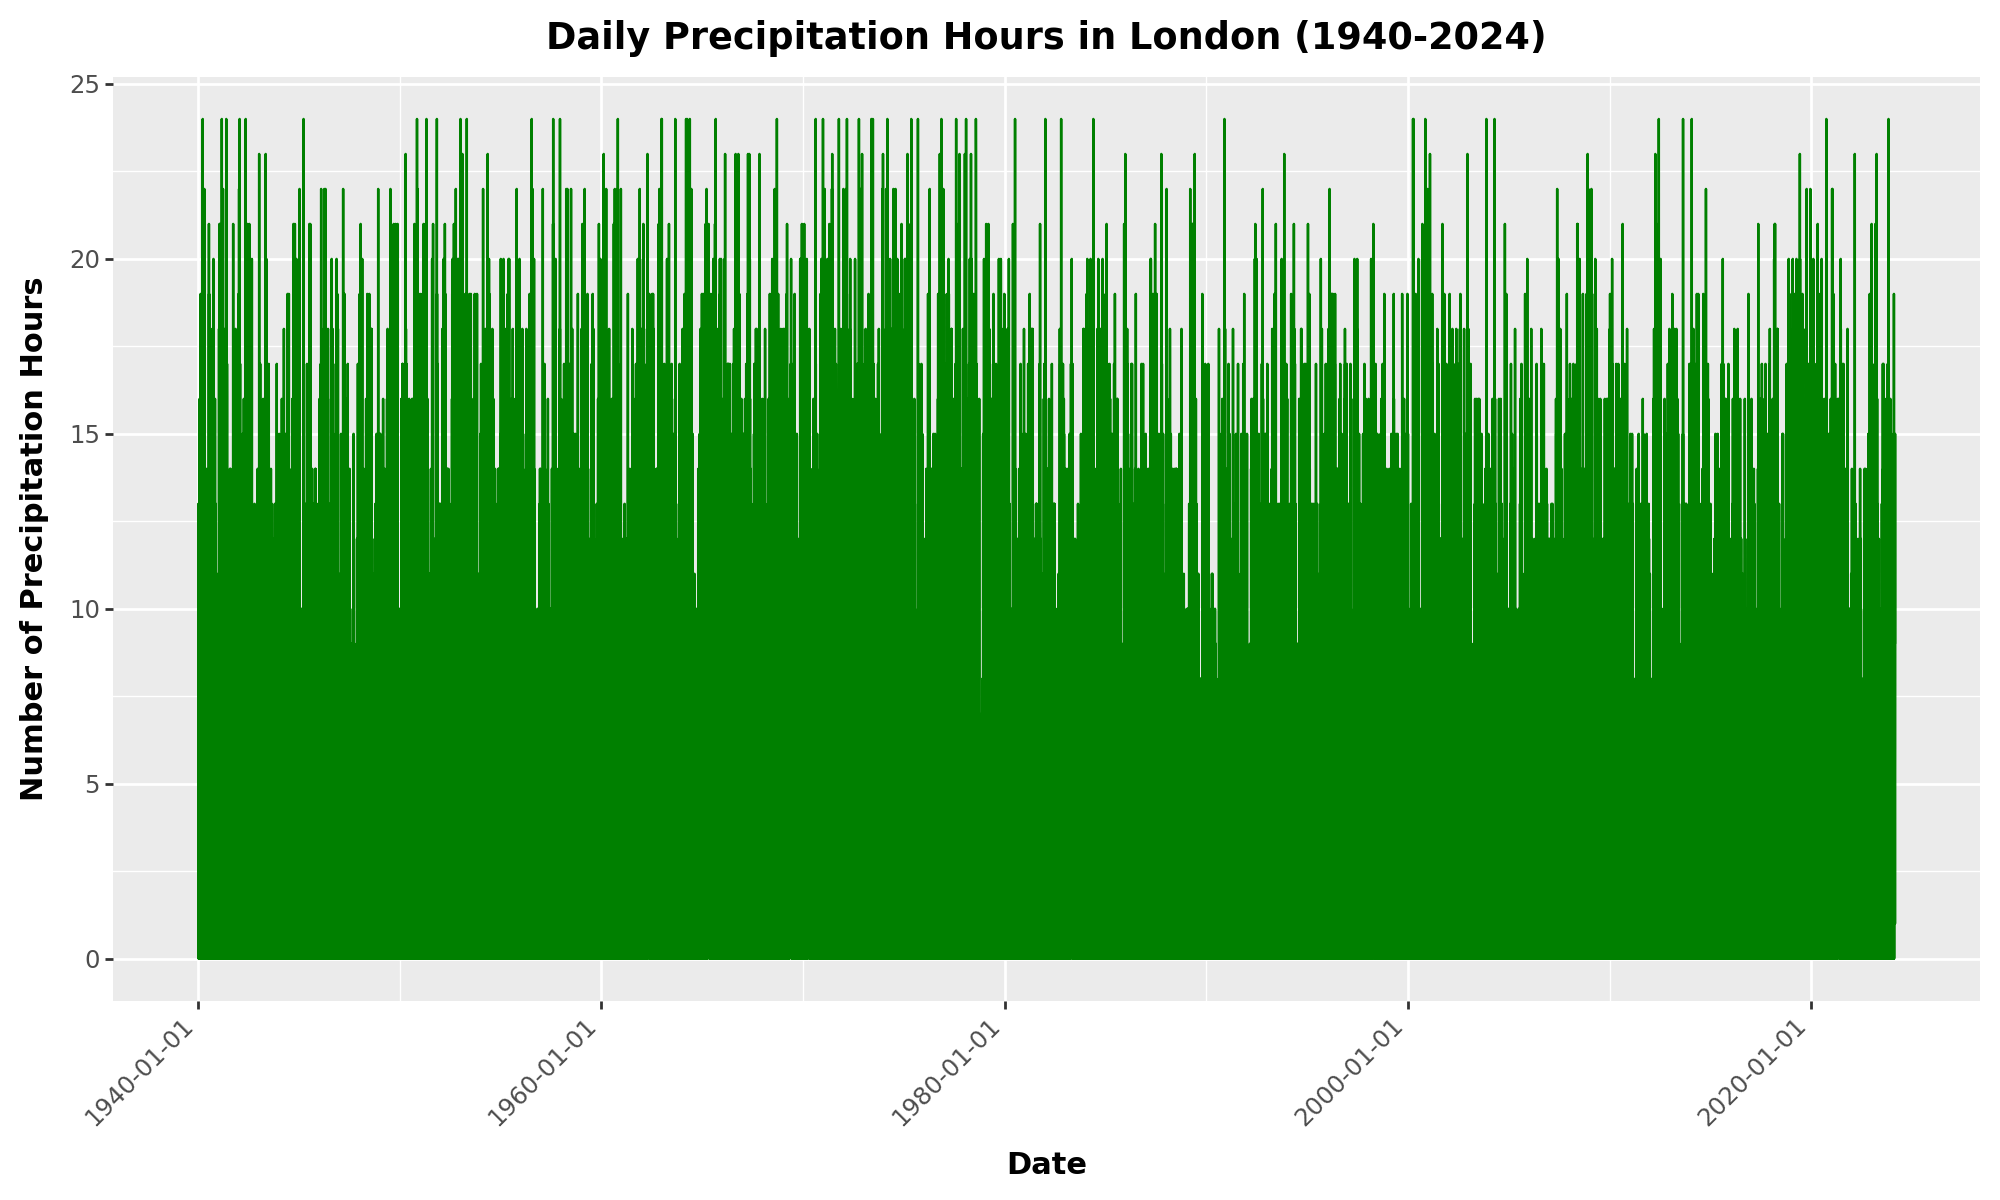

In [30]:
from plotnine import ggplot, aes, geom_line, labs, theme, element_text
from pandas.plotting import register_matplotlib_converters

# Registering converters to avoid warning messages
register_matplotlib_converters()

# Creating a plot using Plotnine
plot = (ggplot(daily_dataframe) +
        aes(x='date', y='precipitation_hours') +
        geom_line(color='green') +
        labs(title='Daily Precipitation Hours in London (1940-2024)', x='Date', y='Number of Precipitation Hours') +
        theme(axis_text_x=element_text(angle=45, hjust=1),
              axis_title=element_text(weight='bold'),
              plot_title=element_text(weight='bold')) +
        theme(figure_size=(10, 6))  # Adjust the figure size
       )

# Displaying the plot
print(plot)


/var/folders/z0/lgs3gf5503zcdkll0zsjwyx40000gn/T/ipykernel_28715/1156234112.py:19: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


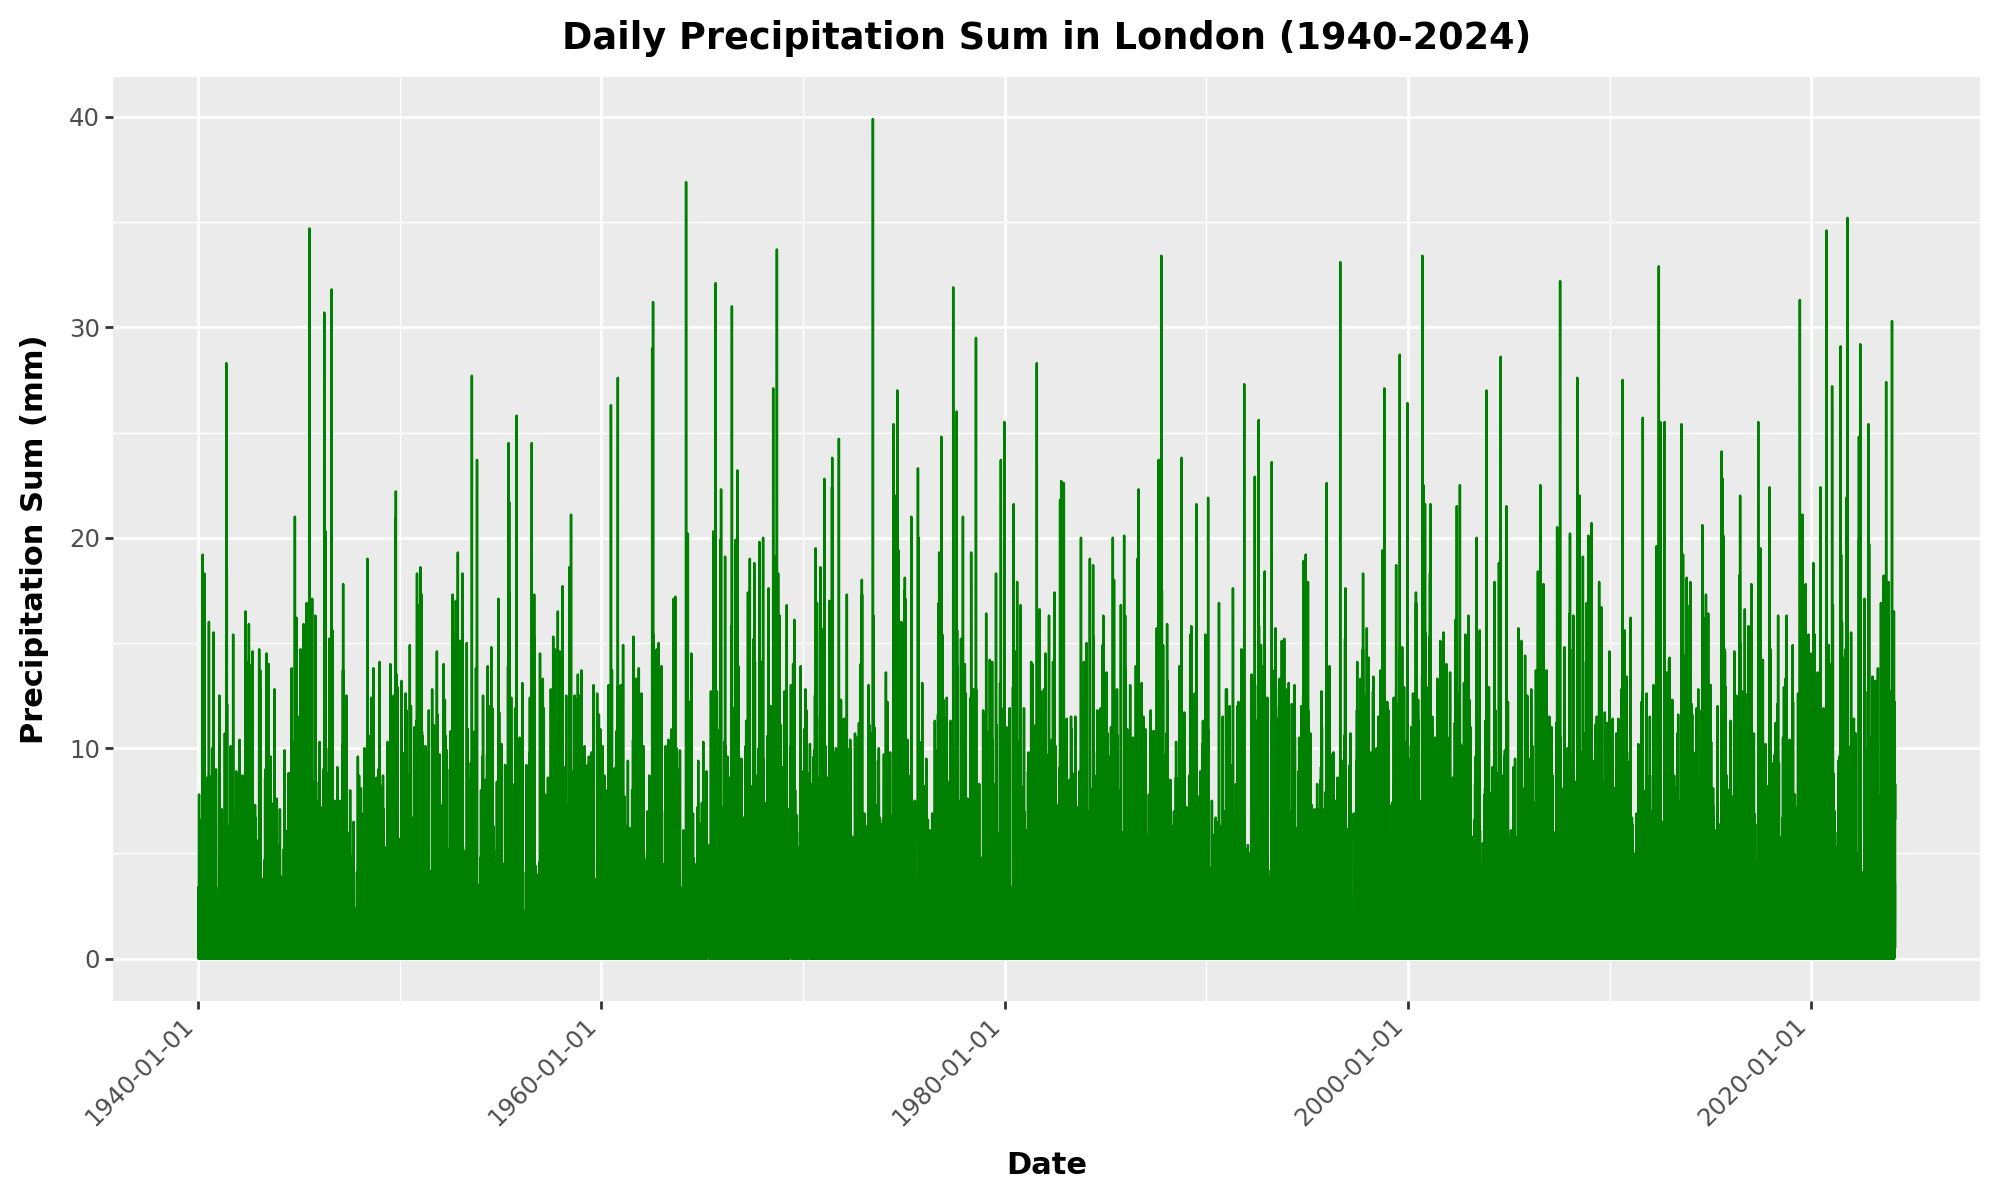

In [31]:
from plotnine import ggplot, aes, geom_line, labs, theme, element_text
from pandas.plotting import register_matplotlib_converters

# Registering converters to avoid warning messages
register_matplotlib_converters()

# Creating a plot using Plotnine
plot = (ggplot(daily_dataframe) +
        aes(x='date', y='precipitation_sum') +
        geom_line(color='green') +
        labs(title='Daily Precipitation Sum in London (1940-2024)', x='Date', y='Precipitation Sum (mm)') +
        theme(axis_text_x=element_text(angle=45, hjust=1),
              axis_title=element_text(weight='bold'),
              plot_title=element_text(weight='bold')) +
        theme(figure_size=(10, 6))  # Adjust the figure size
       )

# Displaying the plot
print(plot)
